In [1]:
from oawidgets.mtg import plot
from openalea.mtg.algo import split
%gui qt

In [6]:
from openalea.strawberry.visu3d import plot3d
from openalea.mtg.algo import orders, union
from openalea.mtg import MTG
from openalea.strawberry.analysis import extract_at_module_scale

In [3]:
from reader_INVENIO import create_mtg, get_metadata_INVENIO, mtg_string_from_INVENIO

## READER

In [4]:
meta_g = MTG()
for i in range(1, 11):
    mtdata = get_metadata_INVENIO(r'20- Lots Ciflorette SL 2 novembre.xls', i)
    s=mtg_string_from_INVENIO(**mtdata)
    g=create_mtg(s)
    meta_g = union(meta_g, g)

In [8]:
meta_g.properties()['order'] = orders(meta_g)
plot3d(meta_g, by=['Genotype'], display=True,)

In [24]:
from collections import OrderedDict, defaultdict
import pandas as pd

from openalea.mtg.io import multiscale_edit


### MACROs

In [14]:
from collections import OrderedDict, defaultdict
import pandas as pd

In [23]:
xls = pd.ExcelFile(r'20- Lots Ciflorette SL 2 novembre.xls')
df = xls.parse(1, header=1,).iloc[:11]
# list(df.keys())

['plant',
 'Diamètre\nmm',
 'Nombre \nVieilles feuilles\nétalées',
 'Nombre \n feuilles\nétalées',
 'Longueur pétiole',
 'LS',
 'LG',
 'Nb stolons dvp',
 'Nb zone de croissance',
 'Détail Hampe terminale ',
 'Unnamed: 10',
 'Unnamed: 11',
 'Unnamed: 12',
 'Détail niveau 1 expressiondu BT - Nombre / stade (les 2 bourgeons sous la HT)',
 'Unnamed: 14',
 'Unnamed: 15',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18',
 'Unnamed: 19',
 'Unnamed: 20',
 'Unnamed: 21',
 'Unnamed: 22',
 'Unnamed: 23',
 'Unnamed: 24',
 'Unnamed: 25',
 "Potentiel supplémentaire Niveau 1 (ne devrait pas s'exprimer en production)",
 'Unnamed: 27',
 'Unnamed: 28',
 'Unnamed: 29',
 'Unnamed: 30',
 'Unnamed: 31',
 'Unnamed: 32',
 'Unnamed: 33',
 'Unnamed: 34',
 'Unnamed: 35',
 'Unnamed: 36',
 'Unnamed: 37',
 'Détail niveau 2 expressiondu BT - Nombre / stade (les 2 bourgeons sous la HT)',
 'Unnamed: 39',
 'Unnamed: 40',
 'Unnamed: 41',
 'Unnamed: 42',
 'Unnamed: 43',
 'Unnamed: 44',
 'Unnamed: 45',
 'Unnamed: 46',
 'Unn

In [42]:
nb_plants=xls.parse(1, index_col=None, usecols = "B", header = 0, nrows=0)
nb_plants = nb_plants.columns.values[0]
nb_plants=float(nb_plants)

In [49]:
calibre_du_plant=df['Diamètre\nmm'].sum()/nb_plants
vieilles_feuilles=df['Nombre \nVieilles feuilles\nétalées'].sum()/nb_plants
feuilles_etalees=df['Nombre \n feuilles\nétalées'].sum()/nb_plants
longueur_petiole=df['Longueur pétiole'].sum()/nb_plants
surface_feuille=1.89+2.145*df['LS'].mean()*df['LG'].mean()
surface_plant=surface_feuille*feuilles_etalees

d=df['Unnamed: 11'][1:]
initiation_HT=d[d>0].count()/nb_plants

feuilles_bt=(df['Détail Hampe terminale '][1:].sum()+df['Unnamed: 10'][1:])/nb_plants
stade_ht=df_repartition[df_repartition['hampe']=='hampe_terminale']['stade moyen']
hauteur_ht=df['Unnamed: 12'][1:].mean()

A1_nb_axi_bt=(df['Unnamed: 14'][1:].sum()+df['Unnamed: 15'][1:].sum())/nb_plants
A1_axi_initie_bt=(df['Unnamed: 15'][1:].sum()/nb_plants)/A1_nb_axi_bt
A1_hampe_axiliaire=A1_nb_axi_bt*A1_axi_initie_bt
TODO: A1_stade_moyen_axi_initie_bt=df_repartition[df_repartition['hampe']=='hampes_axiliaires_bt']['stade moyen']
A1_nb_hampe_potentiel_supplementaire=df['Unnamed: 27'][1:].sum()/nb_plants

# TODO: AX2 /3
A2_nb_hampe_potentiel_supplementaire=df['Unnamed: 51'][1:].sum()/nb_plants

A3_nb_hampe_potentiel_supplementaire=df['Unnamed: 75'][1:].sum()/nb_plants


nb_total_hampe_bt_expression=df_repartition[df_repartition['hampe'].isin(['hampe_terminale', 'hampes_axiliaires_bt', 'hampes_axisecondaires_bt', 'hampes_axitertiaires_bt'])][['19', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']].to_numpy().sum()
nb_total_hampe_bt_potentiel=A1_nb_hampe_potentiel_supplementaire+A2_nb_hampe_potentiel_supplementaire+A3_nb_hampe_potentiel_supplementaire

In [85]:
# tableau - Répartition des stades EXPRESSION
df_repartition = pd.DataFrame(columns=['hampe', '19', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'stade moyen'])
d1=df['Unnamed: 11'][1:]
hampe_terminale = {'hampe':'hampe_terminale',
                   '19':d1[d1==1].count()/nb_plants, 
                   'A':d1[d1==2].count()/nb_plants, 
                   'B':d1[d1==3].count()/nb_plants, 
                   'C':d1[d1==4].count()/nb_plants, 
                   'D':d1[d1==5].count()/nb_plants, 
                   'E':d1[d1==6].count()/nb_plants, 
                   'F':d1[d1==7].count()/nb_plants, 
                   'G':d1[d1==8].count()/nb_plants, 
                   'H':d1[d1==9].count()/nb_plants, 
                   'I':d1[d1==10].count()/nb_plants}

hampes_axiliaires_bt = {'hampe':'hampes_axiliaires_bt',
                        '19':df['Unnamed: 16'][1:].sum()/nb_plants, 
                   'A':df['Unnamed: 17'][1:].sum()/nb_plants, 
                   'B':df['Unnamed: 18'][1:].sum()/nb_plants, 
                   'C':df['Unnamed: 19'][1:].sum()/nb_plants, 
                   'D':df['Unnamed: 20'][1:].sum()/nb_plants, 
                   'E':df['Unnamed: 21'][1:].sum()/nb_plants, 
                   'F':df['Unnamed: 22'][1:].sum()/nb_plants, 
                   'G':df['Unnamed: 23'][1:].sum()/nb_plants, 
                   'H':df['Unnamed: 24'][1:].sum()/nb_plants, 
                   'I':df['Unnamed: 25'][1:].sum()/nb_plants}

hampes_axisecondaires_bt = {'hampe':'hampes_axisecondaires_bt',
                            '19':df['Unnamed: 40'][1:].sum()/nb_plants, 
                   'A':df['Unnamed: 41'][1:].sum()/nb_plants, 
                   'B':df['Unnamed: 42'][1:].sum()/nb_plants, 
                   'C':df['Unnamed: 43'][1:].sum()/nb_plants, 
                   'D':df['Unnamed: 44'][1:].sum()/nb_plants, 
                   'E':df['Unnamed: 45'][1:].sum()/nb_plants, 
                   'F':df['Unnamed: 46'][1:].sum()/nb_plants, 
                   'G':df['Unnamed: 47'][1:].sum()/nb_plants, 
                   'H':df['Unnamed: 48'][1:].sum()/nb_plants, 
                   'I':df['Unnamed: 49'][1:].sum()/nb_plants}

hampes_axitertiaires_bt = {'hampe':'hampes_axitertiaires_bt',
                           '19':df['Unnamed: 64'][1:].sum()/nb_plants, 
                   'A':df['Unnamed: 65'][1:].sum()/nb_plants, 
                   'B':df['Unnamed: 66'][1:].sum()/nb_plants, 
                   'C':df['Unnamed: 67'][1:].sum()/nb_plants, 
                   'D':df['Unnamed: 68'][1:].sum()/nb_plants, 
                   'E':df['Unnamed: 69'][1:].sum()/nb_plants, 
                   'F':df['Unnamed: 70'][1:].sum()/nb_plants, 
                   'G':df['Unnamed: 71'][1:].sum()/nb_plants, 
                   'H':df['Unnamed: 72'][1:].sum()/nb_plants, 
                   'I':df['Unnamed: 73'][1:].sum()/nb_plants}

hampes_axibasales1 = {'hampe':'hampes_axibasales1',
                      '19':df['Unnamed: 88'][1:].sum()/nb_plants, 
                   'A':df['Unnamed: 89'][1:].sum()/nb_plants, 
                   'B':df['Unnamed: 90'][1:].sum()/nb_plants, 
                   'C':df['Unnamed: 91'][1:].sum()/nb_plants, 
                   'D':df['Unnamed: 92'][1:].sum()/nb_plants, 
                   'E':df['Unnamed: 93'][1:].sum()/nb_plants, 
                   'F':df['Unnamed: 94'][1:].sum()/nb_plants, 
                   'G':df['Unnamed: 95'][1:].sum()/nb_plants, 
                   'H':df['Unnamed: 96'][1:].sum()/nb_plants, 
                   'I':df['Unnamed: 97'][1:].sum()/nb_plants}

hampes_axibasales2 = {'hampe':'hampes_axibasales2',
                      '19':df['Unnamed: 100'][1:].sum()/nb_plants, 
                   'A':df['Unnamed: 101'][1:].sum()/nb_plants, 
                   'B':df['Unnamed: 102'][1:].sum()/nb_plants, 
                   'C':df['Unnamed: 103'][1:].sum()/nb_plants, 
                   'D':df['Unnamed: 104'][1:].sum()/nb_plants, 
                   'E':df['Unnamed: 105'][1:].sum()/nb_plants, 
                   'F':df['Unnamed: 106'][1:].sum()/nb_plants, 
                   'G':df['Unnamed: 107'][1:].sum()/nb_plants, 
                   'H':df['Unnamed: 108'][1:].sum()/nb_plants, 
                   'I':df['Unnamed: 109'][1:].sum()/nb_plants}

hampes_axibasales3 = {'hampe':'hampes_axibasales3',
                      '19':df['Unnamed: 112'][1:].sum()/nb_plants, 
                   'A':df['Unnamed: 113'][1:].sum()/nb_plants, 
                   'B':df['Unnamed: 114'][1:].sum()/nb_plants, 
                   'C':df['Unnamed: 115'][1:].sum()/nb_plants, 
                   'D':df['Unnamed: 116'][1:].sum()/nb_plants, 
                   'E':df['Unnamed: 117'][1:].sum()/nb_plants, 
                   'F':df['Unnamed: 118'][1:].sum()/nb_plants, 
                   'G':df['Unnamed: 119'][1:].sum()/nb_plants, 
                   'H':df['Unnamed: 120'][1:].sum()/nb_plants, 
                   'I':df['Unnamed: 121'][1:].sum()/nb_plants}

df_repartition = df_repartition.append(hampe_terminale, ignore_index=True)
df_repartition = df_repartition.append(hampes_axiliaires_bt, ignore_index=True)
df_repartition = df_repartition.append(hampes_axisecondaires_bt, ignore_index=True)
df_repartition = df_repartition.append(hampes_axitertiaires_bt, ignore_index=True)
df_repartition = df_repartition.append(hampes_axibasales1, ignore_index=True)
df_repartition = df_repartition.append(hampes_axibasales2, ignore_index=True)
df_repartition = df_repartition.append(hampes_axibasales3, ignore_index=True)

def compute_stade_moyen(row):
    if row[['19', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']].sum() == 0.:
        pass
    else:
        row['stade moyen'] = (row['19']*1+row['A']*2+row['B']*3+row['C']*4+row['D']*5+row['E']*6+row['F']*7+row['G']*8+row['H']*9+row['I']*10) / row[['19', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']].sum()
    return row

df_repartition = df_repartition.apply(compute_stade_moyen, axis=1)

In [88]:
df_repartition

,hampe,19,A,B,C,D,E,F,G,H,I,stade moyen
0,hampe_terminale,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7,0.3,0.0,8.300000
1,hampes_axiliaires_bt,0.5,0.7,0.5,0.1,0.0,0.0,0.0,0.0,0.0,0.0,2.111111
2,hampes_axisecondaires_bt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
3,hampes_axitertiaires_bt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN
4,hampes_axibasales1,0.0,0.0,0.0,0.0,0.0,0.2,1.0,0.1,0.0,0.0,6.923077
5,hampes_axibasales2,0.7,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.222222
6,hampes_axibasales3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN


<AxesSubplot:xlabel='19'>

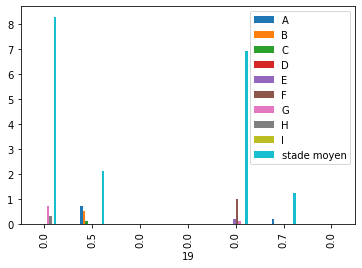

In [112]:
df_repartition.plot(kind='bar',
                    x='19')

In [108]:
df_plot = df_repartition.transpose()
df_plot

,0,1,2,3,4,5,6
hampe,hampe_terminale,hampes_axiliaires_bt,hampes_axisecondaires_bt,hampes_axitertiaires_bt,hampes_axibasales1,hampes_axibasales2,hampes_axibasales3
19,0.0,0.5,0.0,0.0,0.0,0.7,0.0
A,0.0,0.7,0.0,0.0,0.0,0.2,0.0
B,0.0,0.5,0.0,0.0,0.0,0.0,0.0
C,0.0,0.1,0.0,0.0,0.0,0.0,0.0
D,0.0,0.0,0.0,0.0,0.0,0.0,0.0
E,0.0,0.0,0.0,0.0,0.2,0.0,0.0
F,0.0,0.0,0.0,0.0,1.0,0.0,0.0
G,0.7,0.0,0.0,0.0,0.1,0.0,0.0
H,0.3,0.0,0.0,0.0,0.0,0.0,0.0


In [109]:
df_plot.plot(x=[['19', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I']])

KeyError: "None of [Index([('19', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I')], dtype='object')] are in the [columns]"